Practice data set using CO2 emissions data by country and region

Import packages and make data nice to look at

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn_extra.cluster import KMedoids
from mpl_toolkits.mplot3d import Axes3D




In [ ]:
pd.options.display.float_format = '{:20.2f}'.format
pd.set_option('display.max_columns', 999)

Import the data file and check it out

In [ ]:
df_raw = pd.read_csv('Carbon_(CO2)_Emissions_by_Country.csv')
df_raw

In [ ]:
df_raw.info()

In [ ]:
df_raw.describe()

In [ ]:
df_raw.describe(include='O')

The data look consistent at 5677 lines. There are 190 countries in 5 regions.
The min value for both kilotons of CO2 and Metric tons per capita is 0.00 so this needs to be checked.

In [ ]:
df_raw[df_raw['Kilotons of Co2'] == 0].head(10)

In [ ]:
len(df_raw[df_raw['Kilotons of Co2'] == 0.00])

In [ ]:
df_cleaned = df_raw.copy()
df_cleaned = df_cleaned[df_cleaned['Kilotons of Co2'] > 0.00]
len(df_cleaned[df_cleaned['Kilotons of Co2'] == 0.00])

In [ ]:
df_cleaned.describe()

In [ ]:
len(df_cleaned[df_cleaned['Metric Tons Per Capita'] == 0.00])

In [ ]:
df_cleaned[df_cleaned['Metric Tons Per Capita'] == 0].head(10)

In [ ]:
df_cleaned = df_cleaned[df_cleaned['Metric Tons Per Capita'] > 0.00]
len(df_cleaned[df_cleaned['Metric Tons Per Capita'] == 0.00])

In [ ]:
df_cleaned.describe(include='O')

The data has been cleaned up by removing 8 lines where either the Kiloton of CO2 or the Metric Tons per Capita 
were 0.00

Aggregate the data by region, total the CO2 emissions and average the per captita emission

In [ ]:
df_agg = df_cleaned.groupby('Region', as_index=False) \
    .agg(
        region_total=('Kilotons of Co2', 'sum'),
        region_per_capita=('Metric Tons Per Capita', 'mean')
    )

df_agg.head()


,Region,region_total,region_per_capita
0,Africa,29144520.01,1.06
1,Americas,214600270.71,3.65
2,Asia,367129778.95,6.15
3,Europe,179365289.90,7.22
4,Oceania,11518039.99,3.80


In [50]:
df_filter_percap = df_agg[['Region', 'region_per_capita']]
df_filter_regtot = df_agg[['Region', 'region_total']]

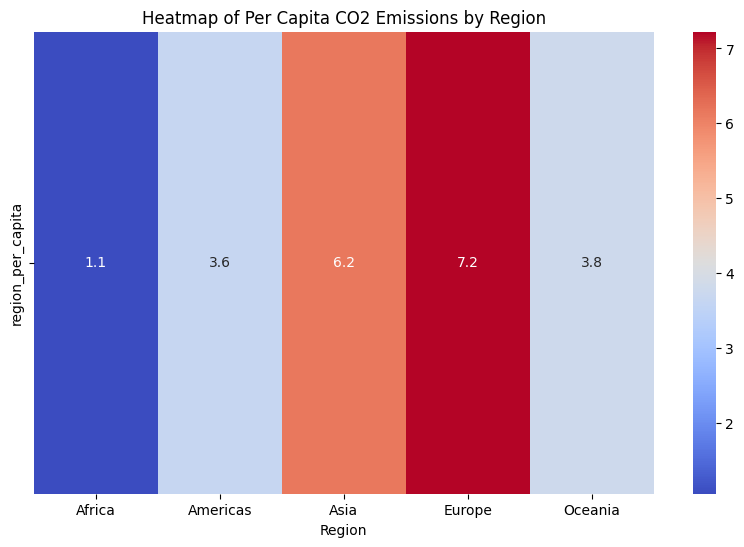

In [51]:
import seaborn as sns
import pandas as pd

plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df_filter_percap.set_index('Region').T, annot=True, cmap='coolwarm')
plt.title('Heatmap of Per Capita CO2 Emissions by Region')
plt.show()


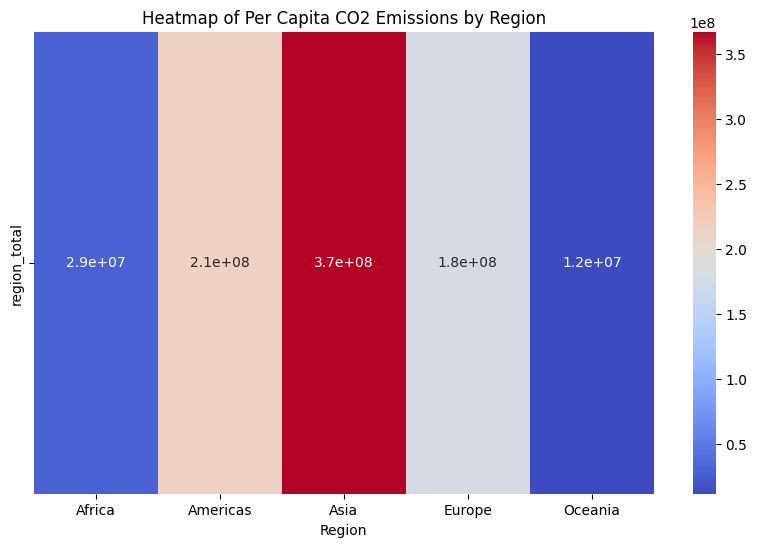

In [52]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df_filter_regtot.set_index('Region').T, annot=True, cmap='coolwarm')
plt.title('Heatmap of Per Capita CO2 Emissions by Region')
plt.show()